#Project Akhir NLP Analisis Sentimen

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import dataset

In [ ]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATASET CYBERBULLYING INSTAGRAM - FINAL.xlsx to DATASET CYBERBULLYING INSTAGRAM - FINAL (1).xlsx


In [ ]:
df = pd.read_excel('DATASET CYBERBULLYING INSTAGRAM - FINAL.xlsx')
df

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
...,...,...,...,...,...,...,...,...
645,646,@_sigesrek,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
646,647,@safronlux.id,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
647,648,@rikzikmuktyana,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
648,649,@antoniusbennys,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN


#Text Pre Processing

In [ ]:
# Lowercase
def lowercase(text):
    return text.lower()

# Hilangkan Tanda Baca
table = str.maketrans("", "", string.punctuation)
def remove_puncts(text):
    return text.translate(table)

# Praproses Teks
def preprocess_text(text):
    text = lowercase(text)
    text = remove_puncts(text)
    return text

In [ ]:
df['Komentar_Cleaned'] = df['Komentar'].apply(preprocess_text)
df.head()

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7,Komentar_Cleaned
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN,kaka tidur yaa udah pagi gaboleh capek2
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN,makan nasi padang aja begini badannya
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN,yang aku suka dari dia adalah selalu cukur jem...
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN,hai kak isyana aku ngefans banget sama kak isy...
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN,manusia apa bidadari sih herann deh cantik ter...


## Labelling

Labeling kategori ***BULLYING*** = 0 dan ***NON-BULLYING***  = 1

In [ ]:
df['Kategori'].replace(['Non-bullying'],1, inplace=True)
df['Kategori'].replace(['Bullying'],0, inplace=True)
df.head(8)

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7,Komentar_Cleaned
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",1,14 Oktober 2019,@isyanasarasvati,NaN,NaN,kaka tidur yaa udah pagi gaboleh capek2
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",1,14 Oktober 2019,@isyanasarasvati,NaN,NaN,makan nasi padang aja begini badannya
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",0,14 Oktober 2019,@isyanasarasvati,NaN,NaN,yang aku suka dari dia adalah selalu cukur jem...
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",1,14 Oktober 2019,@isyanasarasvati,NaN,NaN,hai kak isyana aku ngefans banget sama kak isy...
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",1,14 Oktober 2019,@isyanasarasvati,NaN,NaN,manusia apa bidadari sih herann deh cantik ter...
5,6,@e.fril,"""@ayu.kinantii isyan skrg berubah ya:( baju ny...",0,14 Oktober 2019,@isyanasarasvati,NaN,NaN,ayukinantii isyan skrg berubah ya baju nya nakal
6,7,@bahasa.bayi.planet,"""Gemesnya isyan kayak tango, berlapis lapis ci...",1,16 September 2019,@isyanasarasvati,NaN,NaN,gemesnya isyan kayak tango berlapis lapis ciaaaa
7,8,@khanayarudinita,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",0,22 Juni 2019,@tasyakamila,NaN,NaN,makin jelek aja anaknya padahal ibu ayahnya ca...


# Train Test SPlit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Komentar_Cleaned'], df['Kategori'])

#Vectorization

In [ ]:
maxlen = df["Komentar_Cleaned"].str.split().str.len().max()
maxlen

31

## Tokenizer

In [ ]:
# Tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000)

# Update kosa kata
tokenizer.fit_on_texts(df["Komentar_Cleaned"])

# Ubah teks menjadi sequence
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

# # Samakan panjang kalimat
X_train_sequence = keras.preprocessing.sequence.pad_sequences(X_train_sequence, maxlen=maxlen, padding="post")
X_test_sequence = keras.preprocessing.sequence.pad_sequences(X_test_sequence, maxlen=maxlen, padding="post")

In [ ]:
X_train_sequence.shape

(487, 31)

In [ ]:
X_test_sequence.shape

(163, 31)

In [ ]:
X_train_sequence

array([[ 154,   71,   47, ...,    0,    0,    0],
       [ 683, 1359,  455, ...,    0,    0,    0],
       [  55, 1023,   44, ...,    0,    0,    0],
       ...,
       [1629,   80,   14, ...,    0,    0,    0],
       [  42,   62,   36, ...,    0,    0,    0],
       [  48,   10,   14, ...,    0,    0,    0]], dtype=int32)

#Modelling

In [ ]:
# Parameter Belajar
BATCH_SIZE = 32
EPOCH = 30
EMBEDDING_DIM = 32

##Word Embedding

In [ ]:
# Model menerima input dengan dimensi ke-2 sebesar "maxlen"
inputs = keras.layers.Input(shape=(maxlen,))

# Tiap elemen dalam dimensi terakhir akan di tanamkan vektor
x = keras.layers.Embedding(10000, EMBEDDING_DIM, input_length=maxlen)(inputs)

# Ratakan word embedding
x = keras.layers.Flatten()(x)

# Salurkan ke layer klasifikasi
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

# Buat model
model_embed = keras.models.Model(inputs=inputs, outputs=outputs)

# Compile
model_embed.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# Cek struktur model
model_embed.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 31)]              0         
                                                                 
 embedding_11 (Embedding)    (None, 31, 32)            320000    
                                                                 
 flatten_3 (Flatten)         (None, 992)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 993       
                                                                 
Total params: 320,993
Trainable params: 320,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history_embedding = model_embed.fit(
    x=X_train_sequence,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
)

Epoch 1/30
13/13 [==============================] - 1s 24ms/step - loss: 0.6962 - binary_accuracy: 0.4550 - val_loss: 0.6924 - val_binary_accuracy: 0.4592
Epoch 2/30
13/13 [==============================] - 0s 10ms/step - loss: 0.6773 - binary_accuracy: 0.7686 - val_loss: 0.6824 - val_binary_accuracy: 0.6735
Epoch 3/30
13/13 [==============================] - 0s 11ms/step - loss: 0.6579 - binary_accuracy: 0.9254 - val_loss: 0.6789 - val_binary_accuracy: 0.7347
Epoch 4/30
13/13 [==============================] - 0s 10ms/step - loss: 0.6354 - binary_accuracy: 0.9949 - val_loss: 0.6728 - val_binary_accuracy: 0.7449
Epoch 5/30
13/13 [==============================] - 0s 10ms/step - loss: 0.6069 - binary_accuracy: 0.9846 - val_loss: 0.6604 - val_binary_accuracy: 0.7245
Epoch 6/30
13/13 [==============================] - 0s 9ms/step - loss: 0.5701 - binary_accuracy: 0.9563 - val_loss: 0.6460 - val_binary_accuracy: 0.7143
Epoch 7/30
13/13 [==============================] - 0s 11ms/step - loss

In [ ]:
def history_line_plot(history, keys, title=""):
    for key in keys:
        plt.plot(history[key], label=key)
    plt.title(title)
    plt.legend()
    plt.show()

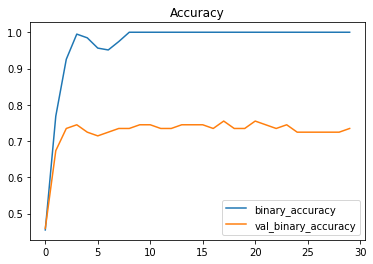

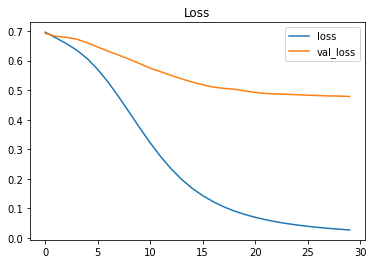

In [ ]:
history_line_plot(
    history=history_embedding.history, 
    keys=["binary_accuracy", "val_binary_accuracy"],
    title="Accuracy"
)

history_line_plot(
    history=history_embedding.history, 
    keys=["loss", "val_loss"],
    title="Loss"
)

## RNN

In [ ]:
# Model menerima input dengan dimensi ke-2 sebesar "maxlen"
inputs = keras.layers.Input(shape=(maxlen,))

# Tiap elemen dalam dimensi terakhir akan di tanamkan vektor
x = keras.layers.Embedding(10000, EMBEDDING_DIM, input_length=maxlen)(inputs)

# Menginput layer RNN
x = keras.layers.SimpleRNN(16)(x)

# Salurkan ke layer klasifikasi
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

# Buat model
model_rnn = keras.models.Model(inputs=inputs, outputs=outputs)

# Compile
model_rnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# Cek struktur model
model_rnn.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 31)]              0         
                                                                 
 embedding_12 (Embedding)    (None, 31, 32)            320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 320,801
Trainable params: 320,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history_rnn = model_rnn.fit(
    x=X_train_sequence,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
)

Epoch 1/30
13/13 [==============================] - 2s 40ms/step - loss: 0.6949 - binary_accuracy: 0.5013 - val_loss: 0.6791 - val_binary_accuracy: 0.6122
Epoch 2/30
13/13 [==============================] - 0s 14ms/step - loss: 0.6248 - binary_accuracy: 0.8175 - val_loss: 0.6739 - val_binary_accuracy: 0.5612
Epoch 3/30
13/13 [==============================] - 0s 16ms/step - loss: 0.4611 - binary_accuracy: 0.9486 - val_loss: 0.6776 - val_binary_accuracy: 0.5612
Epoch 4/30
13/13 [==============================] - 0s 16ms/step - loss: 0.2928 - binary_accuracy: 0.9794 - val_loss: 0.6903 - val_binary_accuracy: 0.5816
Epoch 5/30
13/13 [==============================] - 0s 15ms/step - loss: 0.1979 - binary_accuracy: 0.9974 - val_loss: 0.6987 - val_binary_accuracy: 0.5816
Epoch 6/30
13/13 [==============================] - 0s 17ms/step - loss: 0.1441 - binary_accuracy: 1.0000 - val_loss: 0.7013 - val_binary_accuracy: 0.5816
Epoch 7/30
13/13 [==============================] - 0s 14ms/step - los

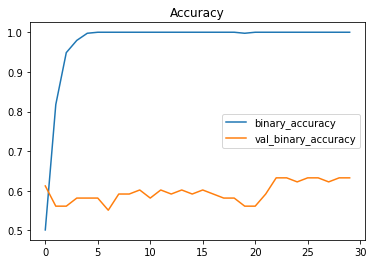

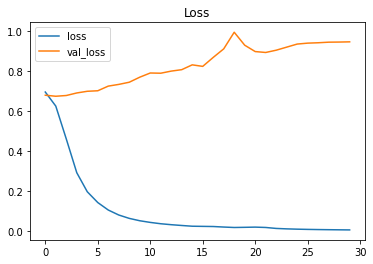

In [ ]:
history_line_plot(
    history=history_rnn.history, 
    keys=["binary_accuracy", "val_binary_accuracy"],
    title="Accuracy"
)

history_line_plot(
    history=history_rnn.history, 
    keys=["loss", "val_loss"],
    title="Loss"
)

##LSTM

In [ ]:
# Model menerima input dengan dimensi ke-2 sebesar "maxlen"
inputs = keras.layers.Input(shape=(maxlen,))

# Tiap elemen dalam dimensi terakhir akan di tanamkan vektor
x = keras.layers.Embedding(10000, EMBEDDING_DIM, input_length=maxlen)(inputs)

# Menginputkan layer LSTM
x = keras.layers.LSTM(16)(x)

# Salurkan ke layer klasifikasi
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

# Buat model
model_lstm = keras.models.Model(inputs=inputs, outputs=outputs)

# Compile
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# Cek struktur model
model_lstm.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 31)]              0         
                                                                 
 embedding_13 (Embedding)    (None, 31, 32)            320000    
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 323,153
Trainable params: 323,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history_lstm = model_lstm.fit(
    x=X_train_sequence,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_split=0.2,
)

Epoch 1/30
13/13 [==============================] - 3s 75ms/step - loss: 0.6945 - binary_accuracy: 0.4884 - val_loss: 0.6921 - val_binary_accuracy: 0.5306
Epoch 2/30
13/13 [==============================] - 0s 24ms/step - loss: 0.6933 - binary_accuracy: 0.4936 - val_loss: 0.6930 - val_binary_accuracy: 0.4694
Epoch 3/30
13/13 [==============================] - 0s 23ms/step - loss: 0.6921 - binary_accuracy: 0.5116 - val_loss: 0.6928 - val_binary_accuracy: 0.4694
Epoch 4/30
13/13 [==============================] - 0s 23ms/step - loss: 0.6887 - binary_accuracy: 0.6221 - val_loss: 0.6825 - val_binary_accuracy: 0.6327
Epoch 5/30
13/13 [==============================] - 0s 26ms/step - loss: 0.6389 - binary_accuracy: 0.7763 - val_loss: 0.5853 - val_binary_accuracy: 0.7959
Epoch 6/30
13/13 [==============================] - 0s 23ms/step - loss: 0.4142 - binary_accuracy: 0.9692 - val_loss: 0.4695 - val_binary_accuracy: 0.8061
Epoch 7/30
13/13 [==============================] - 0s 26ms/step - los

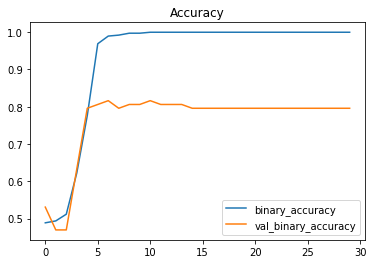

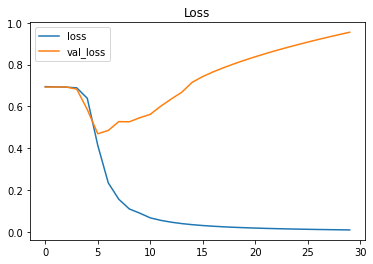

In [ ]:
history_line_plot(
    history=history_lstm.history, 
    keys=["binary_accuracy", "val_binary_accuracy"],
    title="Accuracy"
)

history_line_plot(
    history=history_lstm.history, 
    keys=["loss", "val_loss"],
    title="Loss"
)

#Evaluasi dan Prediksi

In [ ]:
# Evaluasi Word Embeeding
loss, acc = model_embed.evaluate(X_test_sequence, y_test)
print(f"Model test loss: {loss}")
print(f"Model test acc: {acc}")

6/6 [==============================] - 0s 2ms/step - loss: 0.5314 - binary_accuracy: 0.7178
Model test loss: 0.5314205884933472
Model test acc: 0.7177914381027222


In [ ]:
# Evaluasi RNN
loss, acc = model_rnn.evaluate(X_test_sequence, y_test)
print(f"Model test loss: {loss}")
print(f"Model test acc: {acc}")

6/6 [==============================] - 0s 4ms/step - loss: 1.1660 - binary_accuracy: 0.5706
Model test loss: 1.165984869003296
Model test acc: 0.5705521702766418


In [ ]:
# Evaluasi LSTM
loss, acc = model_lstm.evaluate(X_test_sequence, y_test)
print(f"Model test loss: {loss}")
print(f"Model test acc: {acc}")

6/6 [==============================] - 0s 7ms/step - loss: 1.0307 - binary_accuracy: 0.7791
Model test loss: 1.030745267868042
Model test acc: 0.7791411280632019


In [ ]:
# Prediksi menggunakan word embedding
def predict(texts, model):
    texts = [preprocess_text(text) for text in texts]
    seq = tokenizer.texts_to_sequences(texts)
    seq = keras.preprocessing.sequence.pad_sequences(seq, maxlen=maxlen, padding="post")
    probs = model.predict(seq)
    return probs


samples = [
           "kamu cantik sekali", 
           "kamu goblok",
           "apaan sih anjing gajelas"
            ]

probs = predict(samples, model_embed)
predictions = tf.where(probs > 0.5, "KOMENTAR NON-BULLYING", "BULLYING")
predictions = tf.squeeze(predictions, axis=-1)

for sample, prob, label in zip(samples, probs, predictions):
    print(f"Kalimat: {sample}")
    print(f"Probabilitas: {prob}")
    print(f"Label: {label.numpy().decode()}")
    print()

Kalimat: kamu cantik sekali
Probabilitas: [0.6533324]
Label: KOMENTAR NON-BULLYING

Kalimat: kamu goblok
Probabilitas: [0.40219888]
Label: BULLYING

Kalimat: apaan sih anjing gajelas
Probabilitas: [0.13530955]
Label: BULLYING



In [ ]:
# Prediksi menggunakan RNN
def predict(texts, model):
    texts = [preprocess_text(text) for text in texts]
    seq = tokenizer.texts_to_sequences(texts)
    seq = keras.preprocessing.sequence.pad_sequences(seq, maxlen=maxlen, padding="post")
    probs = model.predict(seq)
    return probs


samples = [
           "idiot", 
           "bodoh anda",
           "ga jelas kamu"
            ]

probs = predict(samples, model_rnn)
predictions = tf.where(probs > 0.5, "KOMENTAR NON-BULLYING", "BULLYING")
predictions = tf.squeeze(predictions, axis=-1)

for sample, prob, label in zip(samples, probs, predictions):
    print(f"Kalimat: {sample}")
    print(f"Probabilitas: {prob}")
    print(f"Label: {label.numpy().decode()}")
    print()

Kalimat: idiot
Probabilitas: [0.15346083]
Label: BULLYING

Kalimat: bodoh anda
Probabilitas: [0.15346083]
Label: BULLYING

Kalimat: ga jelas kamu
Probabilitas: [0.77749765]
Label: KOMENTAR NON-BULLYING



# Kesimpulan

Berdasarkan evaluasi di atas, akan dipilih model machine learning **WORD EMBEDDING** dikarenakan akurasi model yang baik dan tingkat loss dari model yang akan semakin turun seiring banyaknya epoch

# ML Deployment


In [ ]:
#Saving model
import joblib
joblib.dump(model_embed, "Model Word Embedding.pkl")

['Model Word Embedding.pkl']